<a href="https://colab.research.google.com/github/salminadia/nadia-salmi/blob/master/nadia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

# Colab library to upload files to notebook
from google.colab import files
#Install Kaggle library
!pip install -q kaggle

In [0]:
#Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
import os
os.environ['KAGGLE_USERNAME'] = "rymbahri" # username from the json file
os.environ['KAGGLE_KEY'] = "0fd86eeb3187bdcab65c287e3c859b03" # key from the json file
!kaggle competitions download -c microsoft-malware-prediction # api copied from kaggle

 98% 658M/672M [00:12<00:00, 85.9MB/s]
100% 672M/672M [00:12<00:00, 56.5MB/s]
 99% 761M/768M [00:24<00:00, 48.8MB/s]
100% 768M/768M [00:24<00:00, 32.3MB/s]
 96% 129M/134M [00:03<00:00, 33.7MB/s]
100% 134M/134M [00:03<00:00, 44.4MB/s]


In [3]:
!unzip sample_submission.csv.zip
!unzip test.csv.zip
!unzip train.csv.zip

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   
Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

import time


# due to Kaggle memory limitations and the enormous dataset size, a sample from the whole
# trainset will be used for ML modeling
train_sample_fraction = 0.2


# another global variable that must be defined is the NA values rate / theshold to ommit columns with
# NA values that pass this rate
na_rate_threshold = 0.9

# theshold to remove columns with unbalanced features to their values 
unbalanced_feature_rate_threshold = 0.9

# Any results you write to the current directory are saved as output.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# I am grateful for the help of author of this kernel for the main idea to load the dataset and save memory space!!
# https://www.kaggle.com/theoviel/load-the-totality-of-the-data

dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage(deep=True).sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [6]:
%%time
train = pd.read_csv('train.csv', dtype=dtypes)

CPU times: user 2min 38s, sys: 7.41 s, total: 2min 46s
Wall time: 2min 45s


In [0]:
good_cols = list(train.columns)

for col in train.columns:
    
    # remove columns with high NA rate
    na_rate = train[col].isnull().sum() / train.shape[0]
    
    # remove columns with high Unbalanced values rate
    unbalanced_rate = train[col].value_counts(normalize=True, dropna=False).values[0]
    
    if na_rate > na_rate_threshold:
        good_cols.remove(col)
    elif unbalanced_rate > unbalanced_feature_rate_threshold:
        good_cols.remove(col)

In [8]:
good_cols

['MachineIdentifier',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IeVerIdentifier',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSVersion

In [0]:
train = train[good_cols]

In [10]:
import gc

gc.collect()

0

In [0]:
categorical_columns = list(train.loc[:, train.dtypes =="category"].columns)
numerical_and_binary_columns = list(train.loc[:, train.dtypes !="category"].columns)
numerical_columns = numerical_and_binary_columns

categorical_columns.remove("MachineIdentifier")

binary_columns = []
for col in (numerical_and_binary_columns):
    if train[col].nunique() == 2:
        binary_columns.append(col)
        numerical_columns.remove(col)

In [12]:
train_sample = train.sample(frac=train_sample_fraction, random_state=42)
del train
gc.collect()

0

In [13]:
train_sample.shape

(1784297, 57)

In [0]:
test_dtypes = {k: v for k, v in dtypes.items() if k in good_cols}

# get all columns except
test = pd.read_csv('test.csv', dtype=test_dtypes, usecols=good_cols[:-1])

#test = reduce_mem_usage(test)

In [0]:
train_sample = train_sample.drop(['MachineIdentifier'], axis=1)
test = test.drop(['MachineIdentifier'], axis=1)

In [0]:
train_sample = train_sample.reset_index(drop=True)

In [0]:
modes = train_sample.mode()

for col in train_sample.columns:
    train_sample[col] = np.where(train_sample[col].isnull(), modes[col], train_sample[col])

del modes

In [0]:
modes_test = test.mode()

for col in test.columns:
    test[col] = np.where(test[col].isnull(), modes_test[col], test[col])

#train_sample.shape
del modes_test

In [19]:
train_sample.shape

(1784297, 56)

In [20]:
test.shape

(7853253, 55)

In [22]:
train_sample.head(20)

,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,1.1.15100.1,4.18.1807.18075,1.273.1234.0,53447.0,1.0,8,85219.0,27.0,205.0,-84,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,RequireAdmin,Desktop,1443.0,275891.0,4.0,5.0,2272.0,953869.0,HDD,952838.0,8192.0,AllinOne,23.000000,1920.0,1080.0,Desktop,lion,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,27.0,120,FullAuto,IS_GENUINE,OEM:DM,0.0,0.0,355.0,19951.0,0,0.0,0,0.0,11.0,1
1,1.1.15100.1,4.18.1807.18075,1.273.1282.0,53447.0,1.0,129,54198.0,27.0,126.0,124,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,RequireAdmin,Notebook,2102.0,248850.0,4.0,5.0,2660.0,476940.0,HDD,457600.0,8192.0,Notebook,13.203125,1280.0,720.0,Mobile,lion,0.000000e+00,10.0.17134.165,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,18.0,72,FullAuto,IS_GENUINE,OEM:DM,0.0,0.0,486.0,48753.0,0,0.0,0,1.0,3.0,0
2,1.1.15100.1,4.9.10586.1106,1.273.781.0,46781.0,2.0,149,122689.0,27.0,181.0,56,10586,768,th2,10586.1176.amd64fre.th2_release_sec.170913-1848,Home,74.0,RequireAdmin,Convertible,2206.0,238234.0,4.0,5.0,2998.0,244198.0,SSD,221251.0,8192.0,Notebook,15.500000,1920.0,1080.0,Mobile,lion,0.000000e+00,10.0.10586.1176,th2_release_sec,10586,1176,Core,CORE,Update,24.0,109,Notify,IS_GENUINE,Retail,0.0,0.0,554.0,33111.0,1,0.0,1,0.0,15.0,0
3,1.1.15200.1,4.18.1807.18075,1.275.1639.0,53447.0,1.0,164,114587.0,27.0,205.0,-84,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Notebook,525.0,265410.0,8.0,5.0,2880.0,228936.0,SSD,228321.0,8192.0,Notebook,15.500000,1920.0,1080.0,Mobile,lion,5.770000e+02,10.0.17134.286,rs4_release,17134,286,Core,CORE,IBSClean,27.0,120,FullAuto,IS_GENUINE,Retail,0.0,0.0,142.0,48473.0,1,0.0,0,0.0,15.0,1
4,1.1.15200.1,4.18.1807.18075,1.275.511.0,47238.0,2.0,207,72421.0,27.0,277.0,75,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,RequireAdmin,Notebook,1443.0,256478.0,4.0,1.0,198.0,476940.0,HDD,464374.0,4096.0,Portable,15.500000,1366.0,768.0,Mobile,lion,0.000000e+00,10.0.17134.228,rs4_release,17134,228,Professional,PROFESSIONAL,Update,8.0,31,FullAuto,IS_GENUINE,OEM:DM,0.0,0.0,355.0,4343.0,1,0.0,1,1.0,13.0,1
5,1.1.15200.1,4.18.1807.18075,1.275.981.0,7945.0,2.0,91,110905.0,27.0,125.0,75,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,117.0,RequireAdmin,Notebook,1443.0,256581.0,4.0,5.0,2302.0,476940.0,HDD,464132.0,4096.0,Portable,15.500000,1366.0,768.0,Mobile,liio,0.000000e+00,10.0.16299.611,rs3_release_svc_escrow,16299,611,Core,CORE,UUPUpgrade,15.0,58,AutoInstallAndRebootAtMaintenanceTime,IS_GENUINE,Retail,0.0,0.0,355.0,19973.0,1,0.0,0,0.0,11.0,1
6,1.1.15200.1,4.18.1807.18075,1.275.

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:
        #print(i)
        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i])

MultiLabelEncoder(categorical_columns, train_sample)

In [24]:
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784297 entries, 0 to 1784296
Data columns (total 56 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   EngineVersion                                      int64  
 1   AppVersion                                         int64  
 2   AvSigVersion                                       int64  
 3   AVProductStatesIdentifier                          float32
 4   AVProductsInstalled                                float16
 5   CountryIdentifier                                  int16  
 6   CityIdentifier                                     float32
 7   OrganizationIdentifier                             float16
 8   GeoNameIdentifier                                  float16
 9   LocaleEnglishNameIdentifier                        int8   
 10  OsBuild                                            int16  
 11  OsSuite                                           

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:
        #print(i)
        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i])

MultiLabelEncoder(categorical_columns, test)

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7853253 entries, 0 to 7853252
Data columns (total 55 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   EngineVersion                                      int64  
 1   AppVersion                                         int64  
 2   AvSigVersion                                       int64  
 3   AVProductStatesIdentifier                          float32
 4   AVProductsInstalled                                float16
 5   CountryIdentifier                                  int16  
 6   CityIdentifier                                     float32
 7   OrganizationIdentifier                             float16
 8   GeoNameIdentifier                                  float16
 9   LocaleEnglishNameIdentifier                        int8   
 10  OsBuild                                            int16  
 11  OsSuite                                           

In [0]:
import numpy as np 
import pandas as pd 
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, cohen_kappa_score, precision_score, recall_score, confusion_matrix
import xgboost as xgb

In [0]:
train_cols = [c for c in train_sample.columns if c not in ["HasDetections"]]
y_train = train_sample["HasDetections"]

In [31]:
y_train.value_counts()

0    893061
1    891236
Name: HasDetections, dtype: int64

In [0]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1001)

In [0]:
# bayesian hpo
# details: https://xgboost.readthedocs.io/en/latest/parameter.html
params = {'tree_method': 'hist',
 'objective': 'binary:logistic',
 'eval_metric': 'auc',
 'learning_rate': 0.0936165921314771,
 'max_depth': 2,
 'colsample_bytree': 0.3561271102144279,
 'subsample': 0.8246604621518232,
 'min_child_weight': 53,
 'gamma': 9.943467991283027,
 'silent': 1}

In [34]:
%%time

oof_preds = np.zeros(train_sample.shape[0])
sub_preds = np.zeros(test.shape[0])

feature_importance_df = pd.DataFrame()

for n_fold, (trn_idx, val_idx) in enumerate(folds.split(train_sample, y_train)):
    
    trn_x, trn_y = train_sample[train_cols].iloc[trn_idx], y_train.iloc[trn_idx]
    val_x, val_y = train_sample[train_cols].iloc[val_idx], y_train.iloc[val_idx]
    
    dtrain = xgb.DMatrix(trn_x, trn_y, feature_names=trn_x.columns)
    dval = xgb.DMatrix(val_x, val_y, feature_names=val_x.columns)
    
    clf = xgb.train(params=params, dtrain=dtrain, num_boost_round=4000, evals=[(dtrain, "Train"), (dval, "Val")],
        verbose_eval= 100, early_stopping_rounds=50) 
    
    oof_preds[val_idx] = clf.predict(xgb.DMatrix(val_x))
    sub_preds += clf.predict(xgb.DMatrix(test[train_cols])) / folds.n_splits

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
    fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    print('\nFold %1d AUC %.6f & std %.6f' %(n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx]), np.std([oof_preds[val_idx]])))
    print('Fold %1d Precision %.6f' %(n_fold + 1, precision_score(val_y, np.round(oof_preds[val_idx])) ))
    print('Fold %1d Recall %.6f' %(n_fold + 1, recall_score(val_y, np.round(oof_preds[val_idx]) )))
    print('Fold %1d F1 score %.6f' % (n_fold + 1,f1_score(val_y, np.round(oof_preds[val_idx]))))
    print('Fold %1d Kappa score %.6f\n' % (n_fold + 1,cohen_kappa_score(val_y, np.round(oof_preds[val_idx]))))
    gc.collect()

print('\nCV AUC score %.6f & std %.6f' % (roc_auc_score(y_train, oof_preds), np.std((oof_preds))))
print('CV Precision score %.6f' % (precision_score(y_train, np.round(oof_preds))))
print('CV Recall score %.6f' % (recall_score(y_train, np.round(oof_preds))))
print('CV F1 score %.6f' % (f1_score(y_train, np.round(oof_preds))))
print('CV Kappa score %.6f' % (cohen_kappa_score(y_train, np.round(oof_preds))))

[0]	Train-auc:0.58549	Val-auc:0.584267
Multiple eval metrics have been passed: 'Val-auc' will be used for early stopping.

Will train until Val-auc hasn't improved in 50 rounds.
[100]	Train-auc:0.685454	Val-auc:0.683122
[200]	Train-auc:0.691776	Val-auc:0.689482
[300]	Train-auc:0.695275	Val-auc:0.693034
[400]	Train-auc:0.697553	Val-auc:0.695322
[500]	Train-auc:0.699634	Val-auc:0.697447
[600]	Train-auc:0.701072	Val-auc:0.698842
[700]	Train-auc:0.702374	Val-auc:0.700149
[800]	Train-auc:0.703658	Val-auc:0.701427
[900]	Train-auc:0.704832	Val-auc:0.702628
[1000]	Train-auc:0.705654	Val-auc:0.703427
[1100]	Train-auc:0.706473	Val-auc:0.704174
[1200]	Train-auc:0.707076	Val-auc:0.704794
[1300]	Train-auc:0.707728	Val-auc:0.705425
[1400]	Train-auc:0.708234	Val-auc:0.705931
[1500]	Train-auc:0.708629	Val-auc:0.706298
[1600]	Train-auc:0.709048	Val-auc:0.706701
[1700]	Train-auc:0.709484	Val-auc:0.707104
[1800]	Train-auc:0.709851	Val-auc:0.707487
[1900]	Train-auc:0.710127	Val-auc:0.707731
[2000]	Train-a

[[583865 309196]
 [313453 577783]]


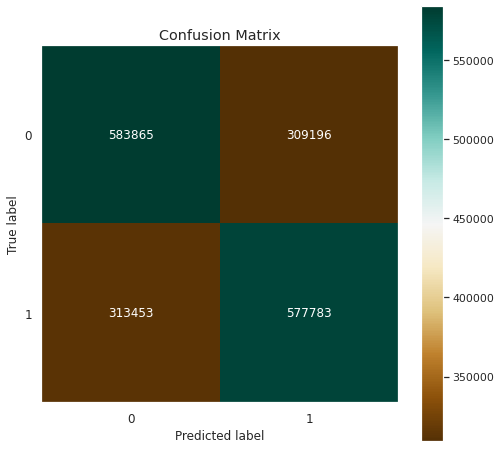

In [45]:
print(confusion_matrix(y_train, np.round(oof_preds)))
skplt.metrics.plot_confusion_matrix(y_train, np.round(oof_preds), cmap="BrBG")

In [37]:
! pip install scikit-plot

In [0]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(val_y, oof_preds, cmap="BrBG")

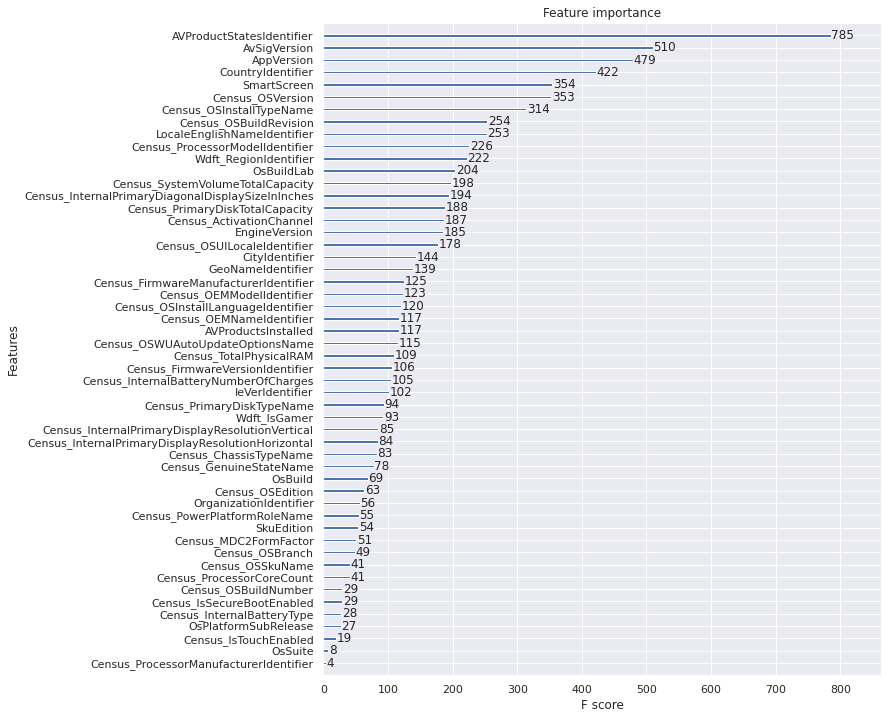

In [49]:
fig, ax = plt.subplots(1,1,figsize=(10,12)) 
xgb.plot_importance(clf, max_num_features=57, ax=ax)  

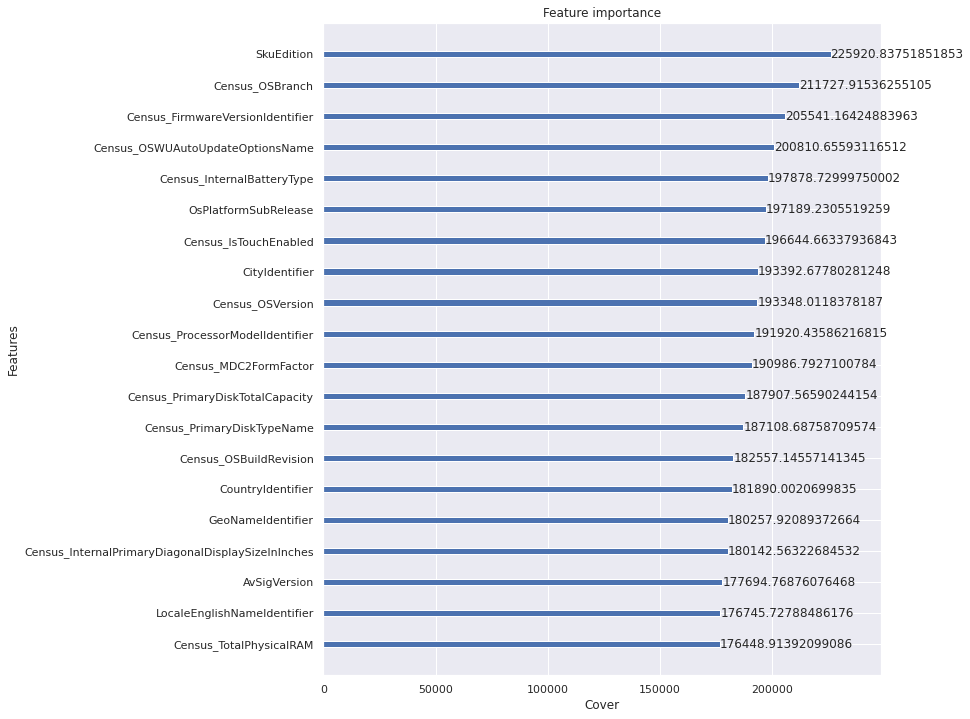

In [50]:
fig, ax = plt.subplots(1,1,figsize=(10,12)) 
xgb.plot_importance(clf, max_num_features=20, ax=ax, importance_type="cover", xlabel="Cover")

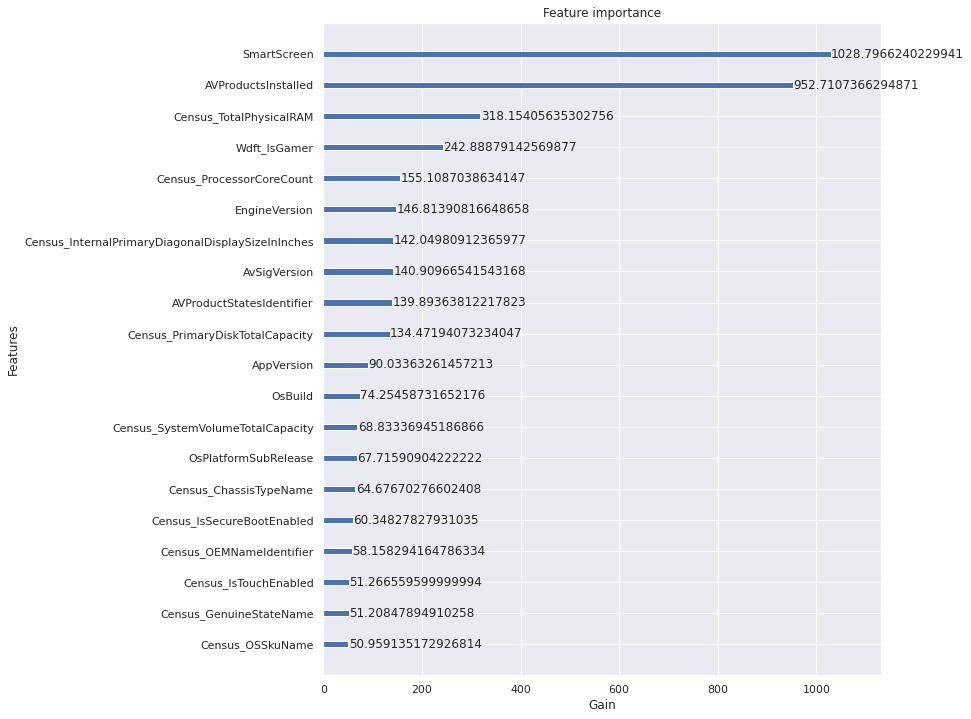

In [51]:
fig, ax = plt.subplots(1,1,figsize=(10,12)) 
xgb.plot_importance(clf, max_num_features=20, ax=ax, importance_type="gain", xlabel="Gain")

In [52]:
feature_importance_df.groupby(["feature"])["fscore",].mean().sort_values("fscore", ascending=False)

,fscore
feature,
AVProductStatesIdentifier,753.0
AvSigVersion,490.0
AppVersion,461.8
CountryIdentifier,402.4
SmartScreen,341.0
Census_OSVersion,339.8
Census_OSInstallTypeName,309.0
LocaleEnglishNameIdentifier,253.2
Census_OSBuildRevision,248.6


In [0]:
test['HasDetections'] = sub_preds

In [55]:
test.head()

,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,68,70,9261,53447.0,1.0,43,58552.0,18.0,53.0,42,15063,768,2,259,4,108.0,13,8,2688.0,30661.0,4.0,5.0,3064.0,488386.0,1,123179.0,8192.0,33,15.500000,1920.0,1080.0,3,42,8.0,255,3,15063,1387,4,2,5,37.0,158,0,1,0,0.0,0.0,807.0,8554.0,1,0.0,0,0.0,7.0,0.623209
1,67,64,9005,53447.0,1.0,68,71395.0,27.0,276.0,74,16299,768,3,270,4,117.0,13,8,2206.0,242491.0,4.0,5.0,3410.0,1907729.0,0,1882352.0,8192.0,33,15.500000,1366.0,768.0,3,42,0.0,323,6,16299,611,4,2,6,7.0,30,0,1,2,0.0,0.0,554.0,33105.0,1,0.0,0,1.0,12.0,0.662946
2,65,64,8501,49480.0,2.0,201,66202.0,27.0,267.0,-5,14393,768,1,201,4,98.0,13,8,585.0,189533.0,2.0,5.0,2096.0,29820.0,1,28678.0,4096.0,33,13.898438,1280.0,720.0,3,42,0.0,174,0,14393,2189,7,5,3,35.0,148,5,1,0,0.0,0.0,556.0,63396.0,1,0.0,0,1.0,11.0,0.520969
3,68,70,9301,42160.0,2.0,29,120917.0,27.0,35.0,-85,16299,768,3,266,4,117.0,13,8,2668.0,171228.0,2.0,5.0,1985.0,476940.0,0,439345.0,4096.0,33,14.000000,1366.0,768.0,3,37,0.0,312,5,16299,371,7,5,8,26.0,119,3,1,0,0.0,0.0,628.0,26320.0,1,0.0,0,0.0,10.0,0.414077
4,67,64,8989,53447.0,1.0,171,124736.0,18.0,211.0,-74,16299,768,3,266,4,117.0,13,8,585.0,189538.0,4.0,5.0,3394.0,476940.0,0,461506.0,2048.0,33,15.500000,1366.0,768.0,3,42,0.0,312,5,16299,371,7,5,7,29.0,125,5,1,2,0.0,0.0,556.0,63269.0,1,0.0,0,1.0,3.0,0.602327


In [56]:
oof_roc = roc_auc_score(y_train, oof_preds)
oof_roc 

0.7122472107766223

In [59]:
ss = pd.DataFrame({ "target":test["HasDetections"]})
ss.to_csv("sant_xgb_%sFold_%.6f.csv"%(folds.n_splits, oof_roc), index=None)
ss.head()

,target
0,0.623209
1,0.662946
2,0.520969
3,0.414077
4,0.602327


In [60]:
ss.shape

(7853253, 1)

In [61]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7853253 entries, 0 to 7853252
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   target  float64
dtypes: float64(1)
memory usage: 59.9 MB


In [62]:
ss.describe().T

,count,mean,std,min,25%,50%,75%,max
target,7853253.0,0.490151,0.132012,0.019213,0.408302,0.507494,0.583492,0.952694


In [3]:
!git clone https://github.com/tensorflow/tpu

Cloning into 'tpu'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 9030 (delta 64), reused 66 (delta 34), pack-reused 8920
Receiving objects: 100% (9030/9030), 24.01 MiB | 37.59 MiB/s, done.
Resolving deltas: 100% (6465/6465), done.


In [0]:
import os

In [5]:
os.environ['COLAB_TPU_ADDR']

'10.14.77.90:8470'

In [0]:
import os
os.chdir('tpu/tools/colab')
!jupyter nbconvert --ExecutePrepocessor.timeout=180 --execute nadia.ipynb

In [11]:
!git clone https://github.com/jupyter/nbconvert.git
!cd nbconvert
!pip install -e .

Cloning into 'nbconvert'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18603 (delta 3), reused 4 (delta 0), pack-reused 18584
Receiving objects: 100% (18603/18603), 3.78 MiB | 20.04 MiB/s, done.
Resolving deltas: 100% (12678/12678), done.
ERROR: File "setup.py" not found. Directory cannot be installed in editable mode: /content/tpu/tools/colab


In [0]:
!pip install nbconvert[test]
!py.test --pyargs nbconvert

In [13]:
!pip install nbconvert